In [1]:
#import the required packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime 
import numpy as np


In [2]:
df=pd.read_csv('C:/Users/NAVAMSHU RAM/Downloads/covid_19_india.csv',parse_dates=['Date'],dayfirst=True)

In [3]:
#Obtaining Active cases from the given dataset
df['Active']=df['Confirmed']-df['Cured']-df['Deaths']

In [4]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
18105,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18106,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18107,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18108,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


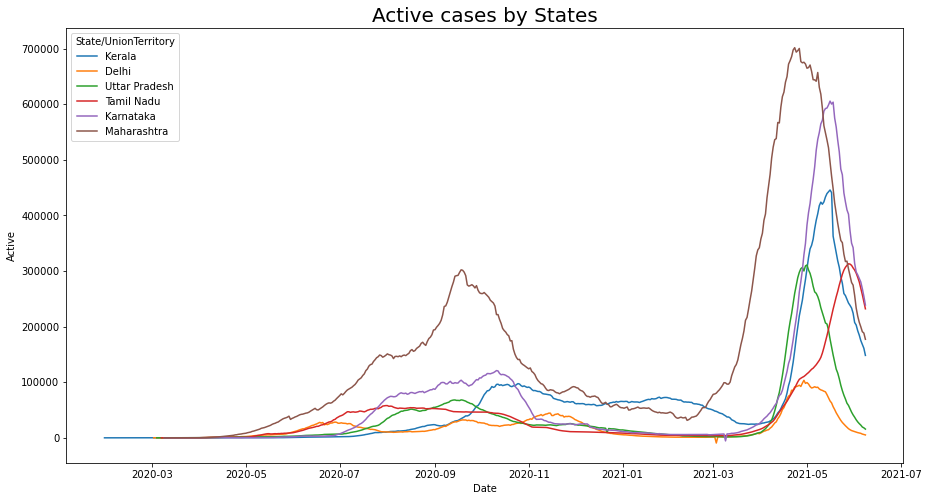

In [5]:
# Active cases in top 6 states during the period of time
fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=df[df['State/UnionTerritory'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra','Uttar Pradesh','Karnataka'])],x='Date',y='Active',hue='State/UnionTerritory')
ax.set_title("Active cases by States", size=20)
plt.show()

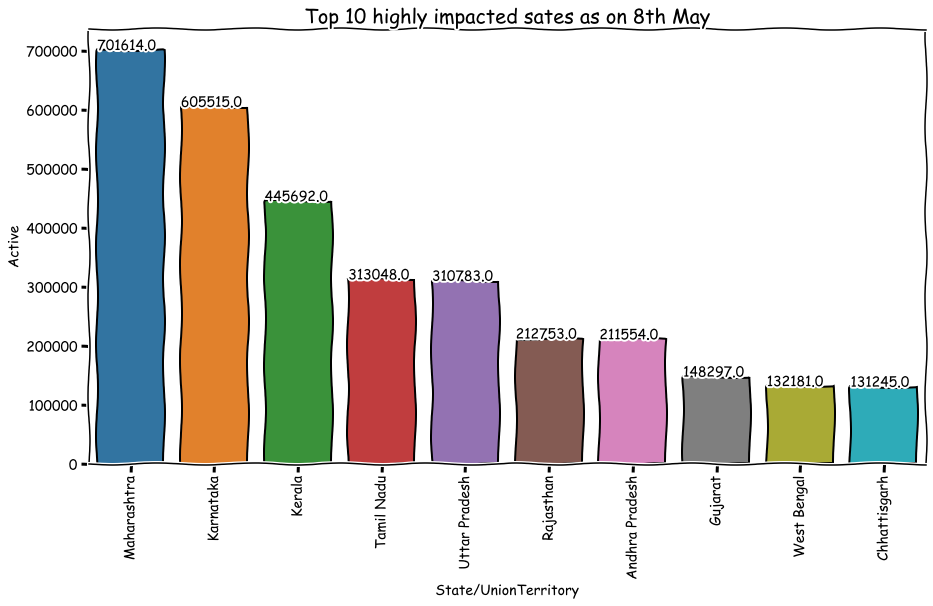

In [6]:
top_10=df.groupby(by='State/UnionTerritory').max()[['Active','Date']].sort_values(by=['Active'],ascending=False).reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title("Top 10 highly impacted sates as on 8th May", size=20)
    ax=sns.barplot(data=top_10.iloc[:10],y='Active',x='State/UnionTerritory', linewidth=2, edgecolor='black')
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())


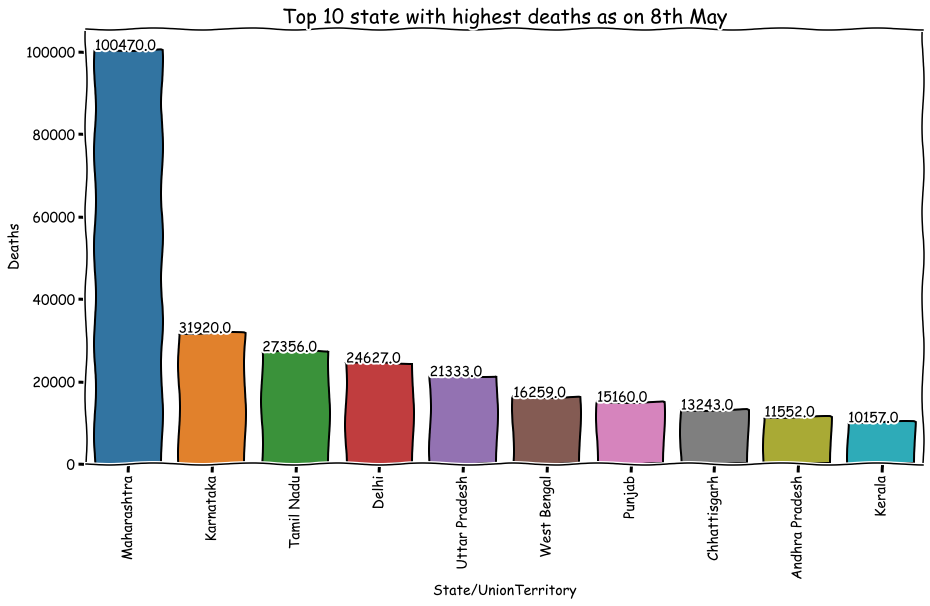

In [7]:
top_10=df.groupby(by='State/UnionTerritory').max()[['Deaths','Date']].sort_values(by=['Deaths'],ascending=False).reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title("Top 10 state with highest deaths as on 8th May", size=20)
    ax=sns.barplot(data=top_10.iloc[:10],y='Deaths',x='State/UnionTerritory', linewidth=2, edgecolor='black')
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())

In [8]:
from matplotlib.ticker import ScalarFormatter
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']

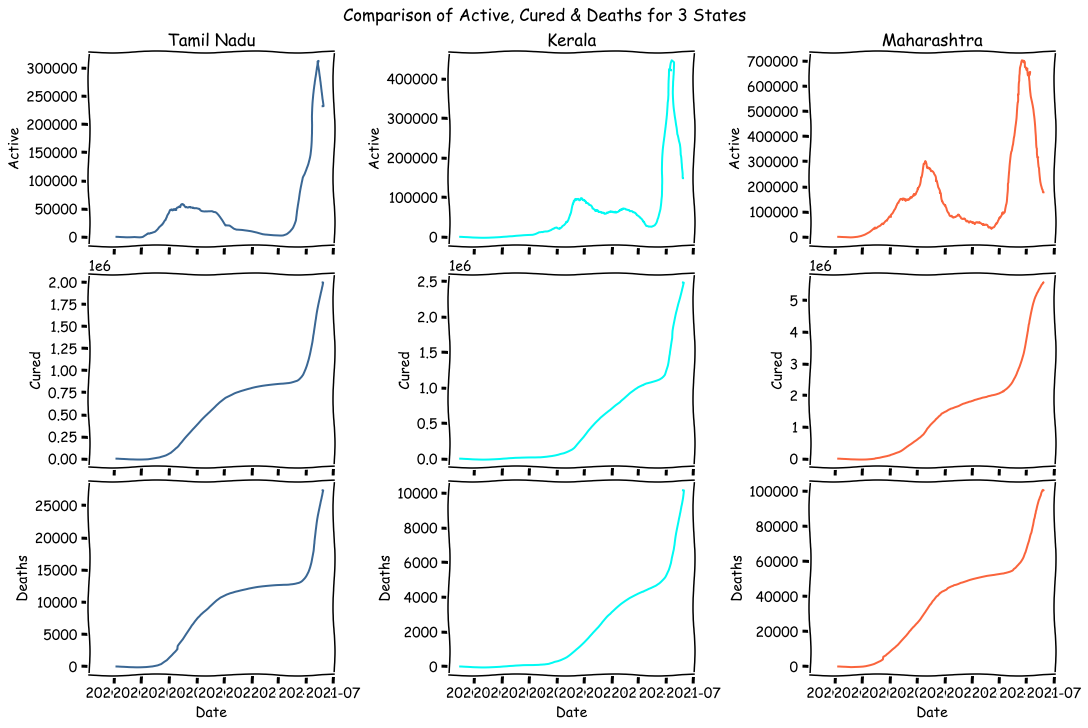

In [9]:
states=['Karnataka', 'Tamil Nadu', 'Maharashtra']
tn=df[df['State/UnionTerritory']=='Tamil Nadu']
kl=df[df['State/UnionTerritory']=='Kerala']
mh=df[df['State/UnionTerritory']=='Maharashtra']

with plt.xkcd():

    fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
    plt.suptitle("Comparison of Active, Cured & Deaths for 3 States")
    sns.lineplot(data=tn, x='Date',y='Active', ax=ax[0,0], color=colors[1])
    ax[0,0].set_title("Tamil Nadu")
    sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
    sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])

    sns.lineplot(data=kl, x='Date',y='Active', ax=ax[0,1], color=colors[2])
    ax[0,1].set_title("Kerala")
    sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
    sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

    sns.lineplot(data=mh, x='Date',y='Active', ax=ax[0,2], color=colors[3])
    ax[0,2].set_title("Maharashtra")
    sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
    sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])

In [10]:
df1 = df.groupby(['Date'])['Confirmed', 'Deaths','Cured','Active'].sum().reset_index()
df1

C:\Users\NAVAMS~2\AppData\Local\Temp/ipykernel_6096/646224902.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df.groupby(['Date'])['Confirmed', 'Deaths','Cured','Active'].sum().reset_index()


,Date,Confirmed,Deaths,Cured,Active
0,2020-01-30,1.0,0.0,0.0,1.0
1,2020-01-31,1.0,0.0,0.0,1.0
2,2020-02-01,2.0,0.0,0.0,2.0
3,2020-02-02,3.0,0.0,0.0,3.0
4,2020-02-03,3.0,0.0,0.0,3.0
...,...,...,...,...,...
491,2021-06-04,28574350.0,340702.0,26597655.0,1635993.0
492,2021-06-05,28694879.0,344082.0,26795549.0,1555248.0
493,2021-06-06,28809339.0,346759.0,26984781.0,1477799.0
494,2021-06-07,28909975.0,349186.0,27159180.0,1401609.0


In [11]:
df1=df1[["Date","Active"]]
df1

,Date,Active
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,2.0
3,2020-02-02,3.0
4,2020-02-03,3.0
...,...,...
491,2021-06-04,1635993.0
492,2021-06-05,1555248.0
493,2021-06-06,1477799.0
494,2021-06-07,1401609.0


In [12]:
df1['Date']=pd.to_datetime(df1['Date'])


C:\Users\NAVAMS~2\AppData\Local\Temp/ipykernel_6096/1647753005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date']=pd.to_datetime(df1['Date'])


In [13]:
X=np.arange(len(df1.Date))
X=X.reshape(-1,1)

In [14]:
y = df1['Active'].values
y=y.reshape(-1,1)

In [15]:
#splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [16]:
#fit the model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(X_train,y_train )

C:\Users\NAVAMS~2\AppData\Local\Temp/ipykernel_6096/1101273975.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train )


RandomForestRegressor(n_estimators=200, random_state=0)

In [17]:
#Making predictions
y_pred=regressor.predict((X_test.reshape(-1,1)))

In [18]:
df3=pd.DataFrame({'Actual':y_test.reshape(-1),'predicted':y_pred.reshape(-1)})
print(df3)

        Actual    predicted
0      22904.0    22243.080
1     883185.0   885559.820
2     512665.0   516298.620
3    1679740.0  1607128.260
4     257656.0   261429.045
..         ...          ...
144  2343152.0  2453516.645
145        3.0        2.840
146   356546.0   356402.040
147   283849.0   281299.675
148   940705.0   941929.455

[149 rows x 2 columns]


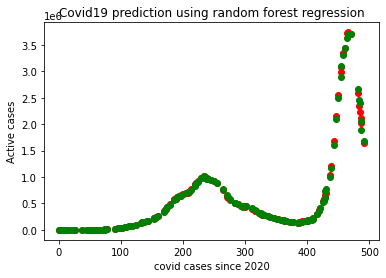

<Figure size 72x72 with 0 Axes>

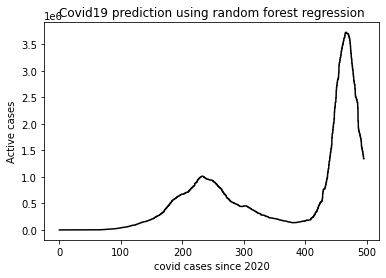

<Figure size 72x72 with 0 Axes>

In [19]:
X_val=np.arange(min(X),max(X),0.01)
X_val=X_val.reshape(len(X_val),1)
plt.scatter(X_test,y_test,color='red')
plt.scatter(X_test,y_pred,color='green')

plt.title('Covid19 prediction using random forest regression')
plt.xlabel('covid cases since 2020')
plt.ylabel('Active cases')
plt.figure(figsize=(1,1))
plt.show()
plt.plot(X_val,regressor.predict(X_val),color='black')
plt.title('Covid19 prediction using random forest regression')
plt.xlabel('covid cases since 2020')
plt.ylabel('Active cases')
plt.figure(figsize=(1,1))
plt.show()

In [20]:
#Performance evaluation
from sklearn import metrics
#print('Mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
#print('Mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
r_square=metrics.r2_score(y_test,y_pred)
print('r square associated with random forest regression',r_square)

Root mean squared error: 29382.545640324464
r square associated with random forest regression 0.9987256068173744
